In [ ]:
#!pip install statsmodels

In [50]:
%matplotlib inline
import math
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import scipy.stats as st
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
info = pd.read_csv("C:/Users/Juss/Documents/master.csv")
info.info()
info.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 1.9+ MB


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


HYPOTHESES

A) As a countries GDP/year rises their suicide totals will fall.

B) As a countries GDP/capita rises their suicide totals will fall.

C) As a countries Human Development Score (HDI) increases their suicide totals will fall.


### Had to strip the ','s and convert the gdp_for_year column from object to int64.

In [15]:
info[' gdp_for_year ($) '] = info[' gdp_for_year ($) '].str.replace(',','')
info[' gdp_for_year ($) '] = info[' gdp_for_year ($) '].astype(np.int64)

Scatterplots to view the distribution of data for the variables of interest. 

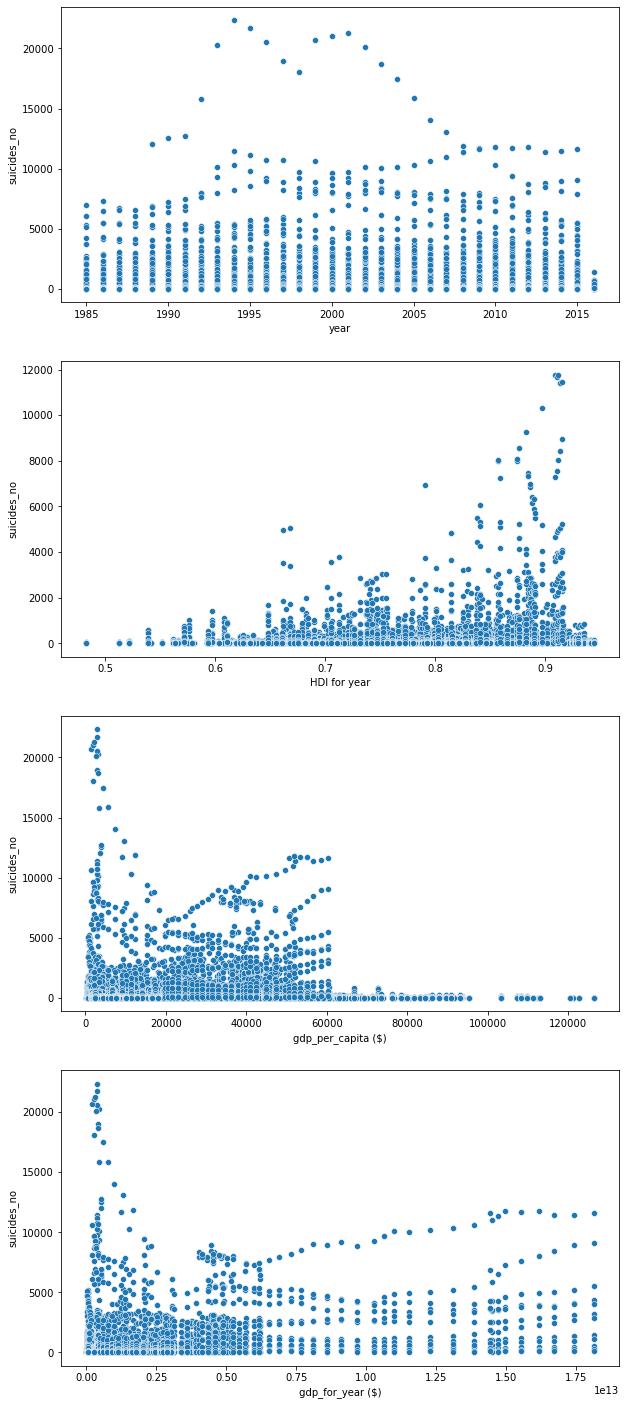

In [17]:
plt.figure(figsize=(10,25))
plt.subplot(411)
sns.scatterplot(x=info['year'], y=info['suicides_no'])
plt.subplot(412)
sns.scatterplot(x=info['HDI for year'], y=info['suicides_no'])
plt.subplot(413)
sns.scatterplot(x=info['gdp_per_capita ($)'], y=info['suicides_no'])
plt.subplot(414)
sns.scatterplot(x=info[' gdp_for_year ($) '], y=info['suicides_no'])
plt.show()

Function for calculating the 95% confidence interval

In [46]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")


Heat map to show any potential correlations. 

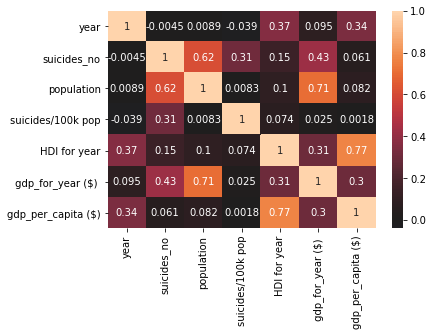

In [ ]:
sns.heatmap(info.corr(), annot=True, center=0.0)

Filtering some specific years for later comparison.

In [22]:
stats2015 = info[info['year'] == 2015]
stats2014 = info[info['year'] == 2014]
stats1992 = info[info['year'] == 1992]
stats1993 = info[info['year'] == 1993]
stats1985 = info[info['year'] == 1985]

Filtering between sexes, this information will not be used for any technical purpose. Was just curious...

In [ ]:
#male = info[info['sex'] == 'male']
#female = info[info['sex'] == 'female']
#info.info()
#info['sex'].value_counts()

In [ ]:
#sns.scatterplot(male['suicides_no'])
#plt.show()

#### Eliminating the null values from the HDI column for HDI comparisons later.

In [102]:
HDI_filter = info.dropna()
#HDI_filter['HDI for year'].describe()
HDI_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8364 entries, 72 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             8364 non-null   object 
 1   year                8364 non-null   int64  
 2   sex                 8364 non-null   object 
 3   age                 8364 non-null   object 
 4   suicides_no         8364 non-null   int64  
 5   population          8364 non-null   int64  
 6   suicides/100k pop   8364 non-null   float64
 7   country-year        8364 non-null   object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   8364 non-null   int64  
 10  gdp_per_capita ($)  8364 non-null   int64  
 11  generation          8364 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 686.1+ KB


# GDP/year analysis

Checking the distribution.

<function matplotlib.pyplot.show(*args, **kw)>

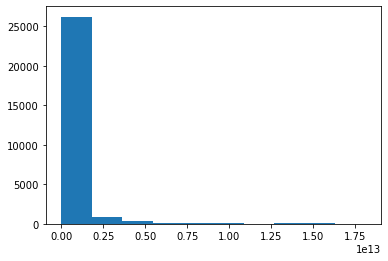

In [18]:
plt.hist(info[' gdp_for_year ($) '])
plt.show

In [ ]:
# Locating the min and max. I will use the bottom 5 compared to the top 5. For the which ever year has the absolute lowest and again for the year that has the absolute highest. 


info[' gdp_for_year ($) '].describe()

#min 4.691962e+07
#max 1.812071e+13

count    2.782000e+04
mean     4.455810e+11
std      1.453610e+12
min      4.691962e+07
25%      8.985353e+09
50%      4.811469e+10
75%      2.602024e+11
max      1.812071e+13
Name:  gdp_for_year ($) , dtype: float64

### Highest GDP/year

MAX MAX 5: (2015) 'United States', 'Japan', 'Germany', 'United Kingdom', 'Italy'
MIN MAX 5: (2015) 'Saint Vincent and Grenadines', 'Grenada', 'Antigua and Barbuda', 'Seychelles', 'Belize'

In [23]:
# 2015 had the highest value for GDP/year of any year. Took the top 5 and bottom 5 countries for that year for comparison.

max_gdp = ['United States', 'Japan', 'Germany', 'United Kingdom', 'Italy']
max_gdp_year = stats2015[stats2015['country'].isin(max_gdp)]

max_min_gdp = ['Saint Vincent and Grenadines', 'Grenada', 'Antigua and Barbuda', 'Seychelles', 'Belize']
bom_max_gdp_year = stats2015[stats2015['country'].isin(max_min_gdp)]


Total suicides for each block of countries. 

In [32]:
print(max_gdp_year['suicides_no'].sum())
print(bom_max_gdp_year['suicides_no'].sum())

86267
37


Boxplots to visualize the data. 

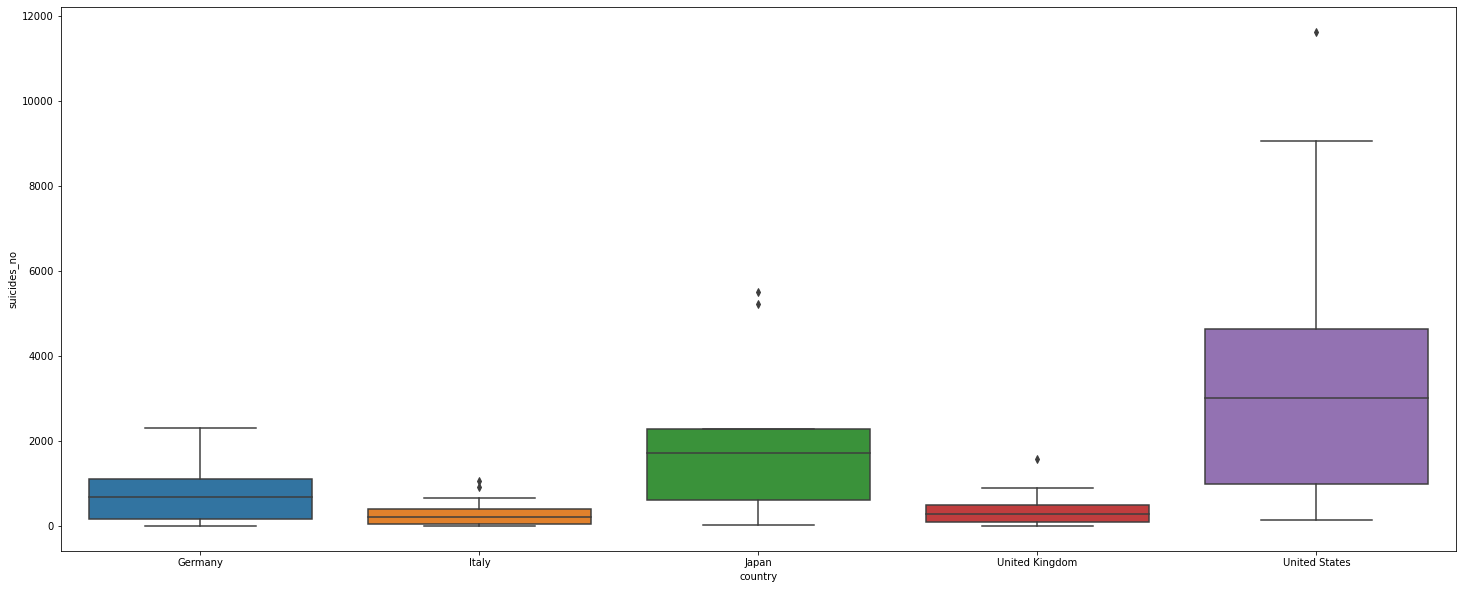

In [30]:
plt.figure(figsize=(25,10))
sns.boxplot(x='country', y='suicides_no', data=max_gdp_year)
plt.show()

###The graph above shows the number of suicides for the countries with the highest GDP in 2015



###The graph below shows the number of suicides for the countries with the lowest GDP in 2015

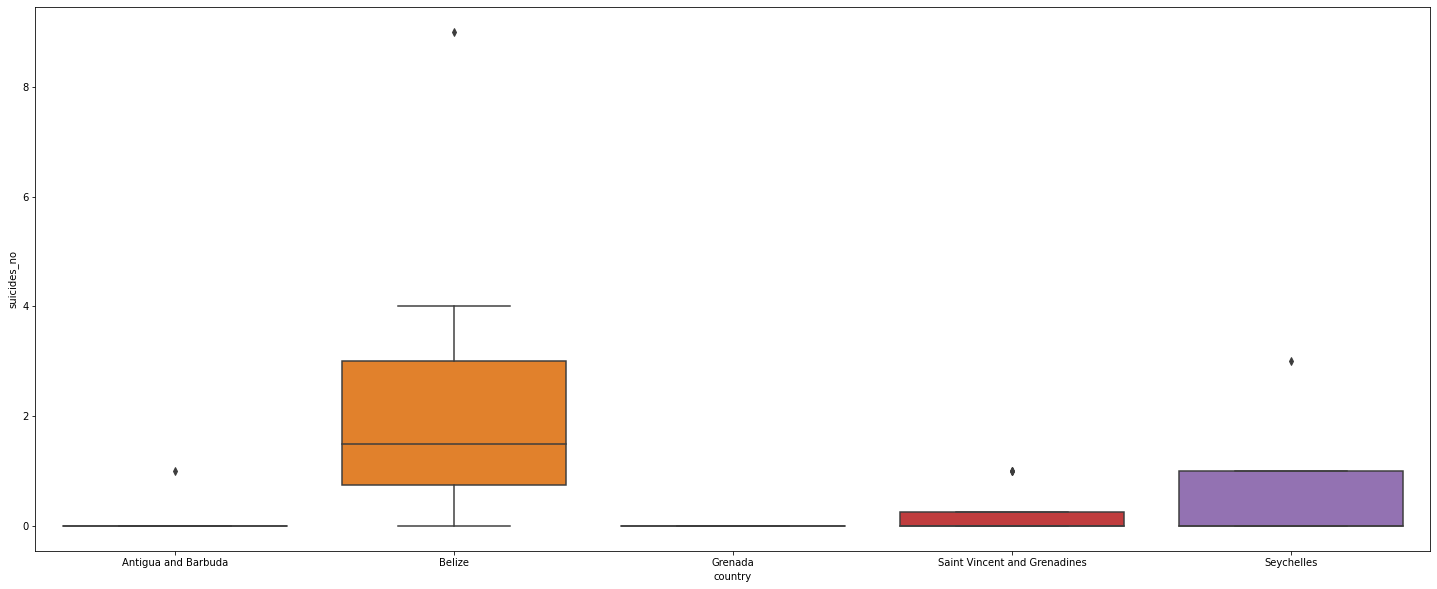

In [29]:
plt.figure(figsize=(25,10))
sns.boxplot(x='country', y='suicides_no', data=bom_max_gdp_year)
plt.show()

The two previous graphs show a VAST difference in the number of suicides for the top five and bottom five countries in terms of GDP for the year of 2015. The data is not evenly distributed so we will use a Mann-Whitney test and Kruskal-Wallis test if there's any significance in the differences. 

In [ ]:
stats.mannwhitneyu(max_gdp_year['suicides_no'], bom_max_gdp_year['suicides_no'])

MannwhitneyuResult(statistic=5.5, pvalue=3.028692260654975e-22)

In [ ]:
stats.kruskal(max_gdp_year['suicides_no'], bom_max_gdp_year['suicides_no'])

KruskalResult(statistic=92.76080296335026, pvalue=5.901242304078644e-22)

Both tests have a p-value exceedingly close to 0 more important they are both <5. There is significant difference between the two sets of data. Although one can not difinitively say a higher GDP leads directly to higher rates of suicide, there is a correlation that exists between the two. 

In [ ]:
get_95_ci(max_gdp_year['suicides_no'], bom_max_gdp_year['suicides_no'])

'The difference in means at the 95% confidence interval (two-tail) is between -1992.9879634160498 and -881.3453699172837.'

Both the values are on the same side of zero. The interval is valid.

### Lowest GDP/year

MIN MIN 5 (1993) 'Kiribati', 'Grenada', 'Guyana', 'Antigua and Barbuda', 'Belize'
MAX MIN 5 (1993) 'United States', 'Japan', 'Germany', 'France', 'Italy'

In [34]:
# 1993 had the highest value for GDP/year of any year. Took the bottom 5 and top 5 countries for that year for comparison.

min_gdp = ['Kiribati', 'Grenada', 'Guyana', 'Antigua and Barbuda', 'Belize']
min_gdp_year = stats1993[stats1993['country'].isin(min_gdp)]

min_max_gdp = ['United States', 'Japan', 'Germany', 'France', 'Italy']
bom_min_gdp_year = stats1993[stats1993['country'].isin(min_max_gdp)]

Total suicides for each block of countries. 

In [35]:
print(min_gdp_year['suicides_no'].sum())
print(bom_min_gdp_year['suicides_no'].sum())

89
81075


Boxplots to visualize the data

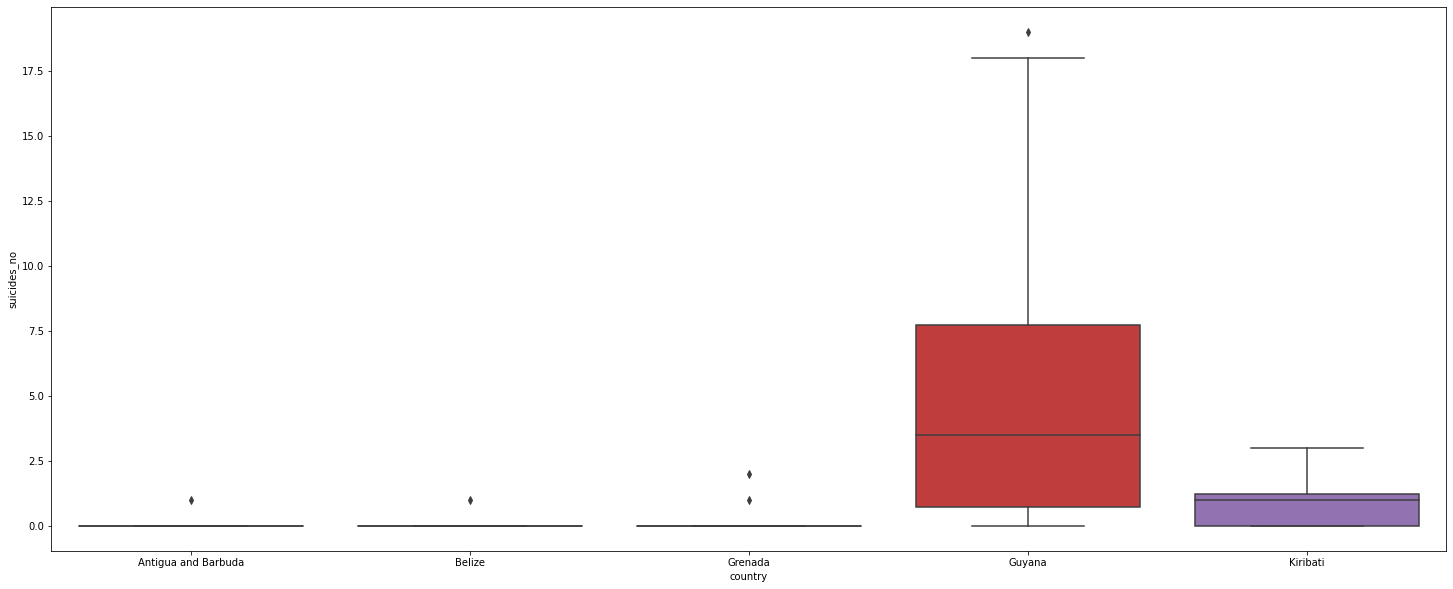

In [ ]:
plt.figure(figsize=(25,10))
sns.boxplot(x='country',y='suicides_no',data=min_gdp_year)
plt.show()

###The graph above shows the number of suicides for the countries with the lowest GDP in 1993



###The graph below shows the number of suicides for the countries with the highest GDP in 1993

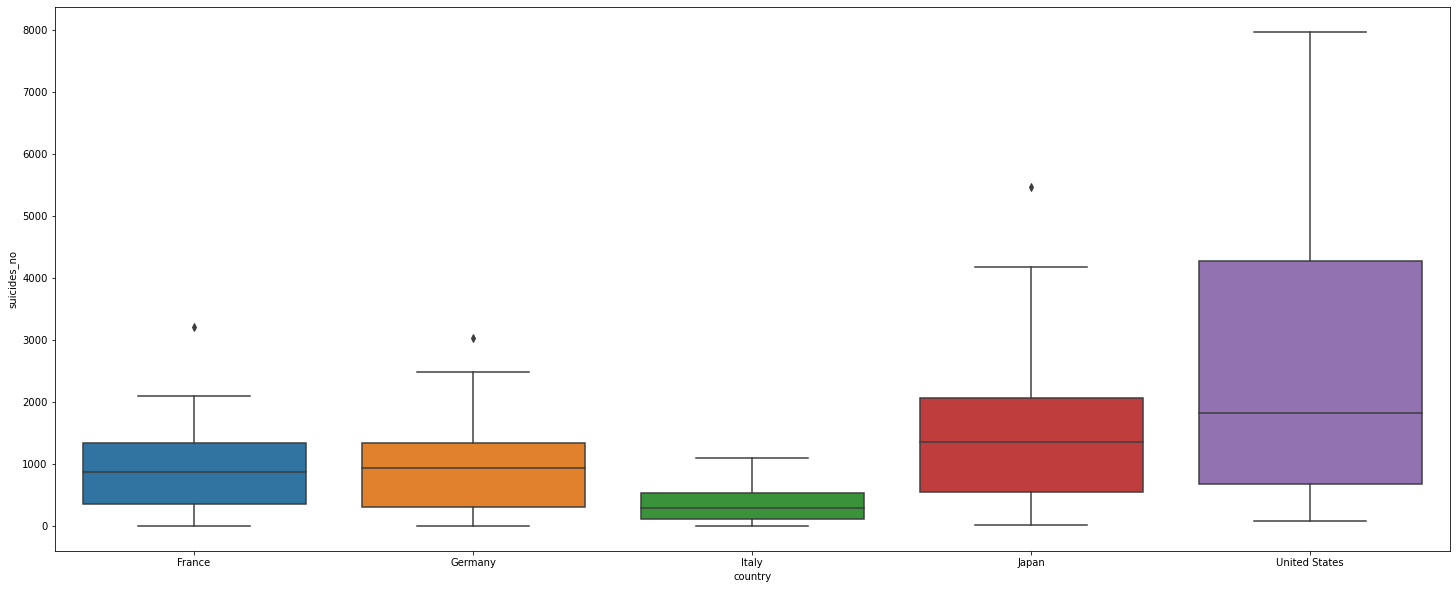

In [ ]:
plt.figure(figsize=(25,10))
sns.boxplot(x='country',y='suicides_no',data=bom_min_gdp_year)
plt.show()

The two previous graphs AGAIN show a vast difference in the number of suicides for the top five and bottom five countries in terms of GDP for the year of 1993. The data is not evenly distributed so we will use a Mood's Median_Test test and Kruskal-Wallis test if there's any significance in the differences.  

In [ ]:
stats.median_test(min_gdp_year['suicides_no'], bom_min_gdp_year['suicides_no'])

(93.63333333333334,
 3.797382535195607e-22,
 14.5,
 array([[ 3, 57],
        [57,  3]], dtype=int64))

In [ ]:
(statistic=91.58947253244064, pvalue=1.0665893043970622e-21)

In [ ]:
stats.kruskal(min_gdp_year['suicides_no'], bom_min_gdp_year['suicides_no'])

KruskalResult(statistic=91.58947253244064, pvalue=1.0665893043970622e-21)

Despite the 22-year gap both datasets show that the null hypothesis can be rejected. The Mood's Median and the Kruskal Wallis test have p-values approaching 0.  

In [ ]:
get_95_ci(min_gdp_year['suicides_no'], bom_min_gdp_year['suicides_no'])

'The difference in means at the 95% confidence interval (two-tail) is between 945.035706194341 and 1754.4976271389924.'

Both values within the interval are positive. The interval is valid. 

# GDP/capita analysis

Checking the distribution

In [ ]:
plt.hist(info['gdp_per_capita ($)'])
plt.show

In [ ]:
# Locating the min and max. I will use the bottom 5 compared to the top 5. For the which ever year has the absolute lowest and again for the year that has the absolute highest. 


info['gdp_per_capita ($)'].describe()
#min 251
#max 126352


### Highest year GDP/capita

MAX MAX 5: (2014) 'Luxembourg', 'Norway', 'Qatar', 'Switzerland', 'Singapore'
MIN MAX 5: (2014) 'Kyrgyzstan', 'Nicaragua', 'Uzbekistan', 'Ukraine', 'El Salvador'

In [41]:
# 2014 had the highest value for GDP/capita of any year. Took the top 5 and bottom 5 countries for that year for comparison.

max_cap = ['Luxembourg', 'Norway', 'Qatar', 'Switzerland', 'Singapore']
max_gdp_cap = stats2014[stats2014['country'].isin(max_cap)]
                                                  
max_min_cap = ['Kyrgyzstan', 'Nicaragua', 'Uzbekistan', 'Ukraine', 'El Salvador']
bom_max_gdp_cap = stats2014[stats2014['country'].isin(max_min_cap)]

Total suicides for each block of countries. 

In [42]:
print(max_gdp_cap['suicides_no'].sum())
print(bom_max_gdp_cap['suicides_no'].sum())

2057
11221


Boxplots to visualize the data

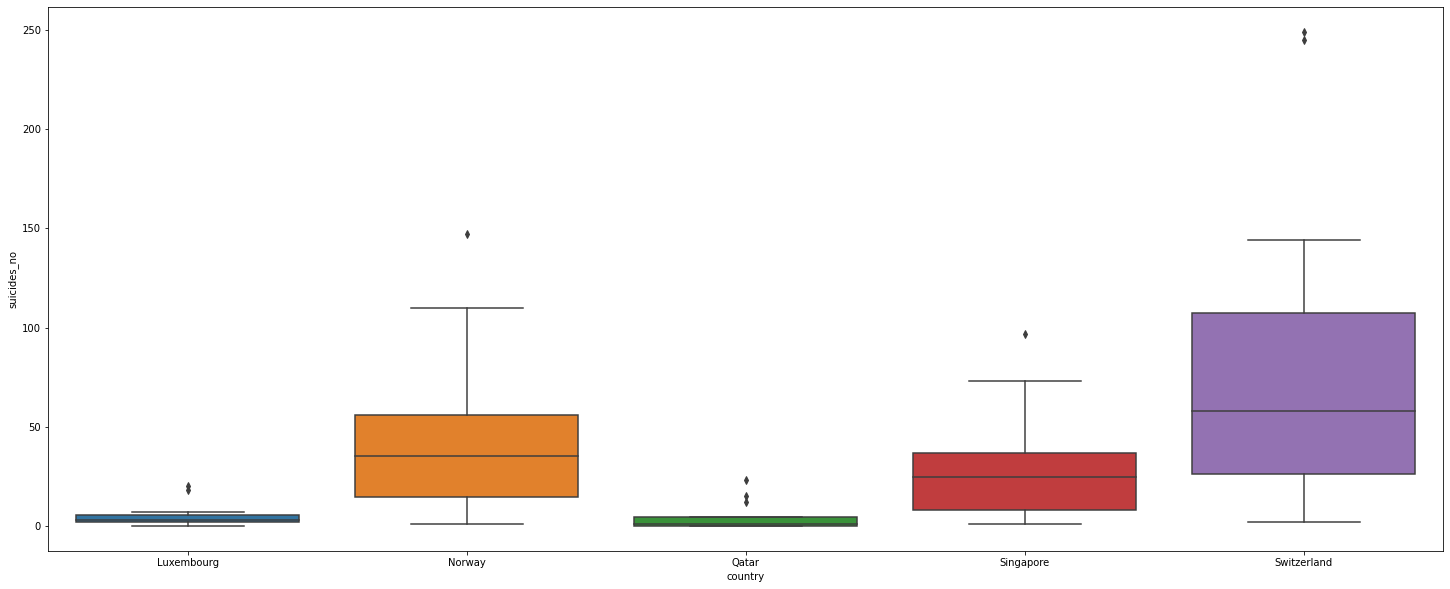

In [ ]:
plt.figure(figsize=(25,10))
sns.boxplot(x='country',y='suicides_no',data=max_gdp_cap)
plt.show()

###The graph above shows the number of suicides for the countries with the highest GDP/capita in 2014 



###The graph below shows the number of suicides for the countries with the lowest GDP/capita in 2014 

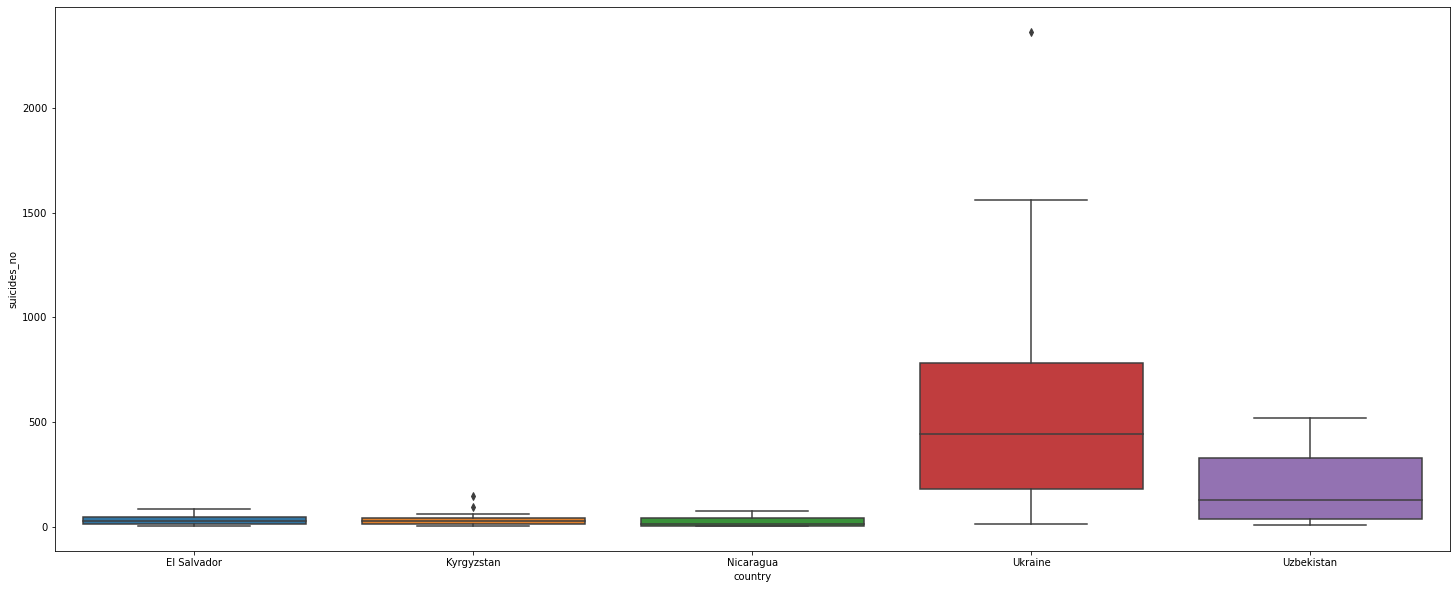

In [ ]:
plt.figure(figsize=(25,10))
sns.boxplot(x='country',y='suicides_no',data=bom_max_gdp_cap)
plt.show()

There is some overlap between some of the values within these two data sets. As such a higher pvalue should be returned when compared to that of GDP/year data. I will use a Mood's Median test and a Mann-Whitney test to further understand any correlation between GDP/capita and suicides. 

In [ ]:
stats.median_test(max_gdp_cap['suicides_no'], bom_max_gdp_cap['suicides_no'])

(5.633333333333334,
 0.017622090962324415,
 22.5,
 array([[23, 37],
        [37, 23]], dtype=int64))

In [ ]:
(statistic=1048.0, pvalue=3.970252226239632e-05)

In [ ]:
stats.mannwhitneyu(max_gdp_cap['suicides_no'], bom_max_gdp_cap['suicides_no'])

MannwhitneyuResult(statistic=1048.0, pvalue=3.970252226239632e-05)

As expected the pvalues are still low enough to reject the null hypothesis but the correlation is not as strong when compared to GDP/year. The Mood's test returned a value only .04 away from the ideal threshold of .05. Although the Mann-Whitney test is still very close to zero it is 17 decimal places closer to .05 than GDP/year. 

In [ ]:
get_95_ci(max_gdp_cap['suicides_no'], bom_max_gdp_cap['suicides_no'])

'The difference in means at the 95% confidence interval (two-tail) is between 49.746447855548794 and 255.7202188111179.'

Both values within the interval are larger than 0. The interval is valid. 

### Lowest year GDP/capita


MIN MIN 5 (1992) 'Albania', 'Armenia', 'Guyana', 'Kyrgyzstan', 'Uzbekistan'
MAX MIN 5 (1992) 'Luxembourg', 'Sweden', 'Japan', 'Norway', 'Iceland'

In [37]:
# 1992 had the lowest value for GDP/capita of any year. Took the bottom 5 and top 5 of that year for comparison.

min_cap = ['Albania', 'Armenia', 'Guyana', 'Kyrgyzstan', 'Uzbekistan']
min_gdp_cap = stats1992[stats1992['country'].isin(min_cap)]

min_max_cap = ['Luxembourg', 'Sweden', 'Japan', 'Norway', 'Iceland']
bom_min_gdp_cap = stats1992[stats1992['country'].isin(min_max_cap)]

Total suicides for each block of countries. 

In [44]:
print(min_gdp_cap['suicides_no'].sum())
print(bom_min_gdp_cap['suicides_no'].sum())

2043
22814


Boxplots to visualize the data

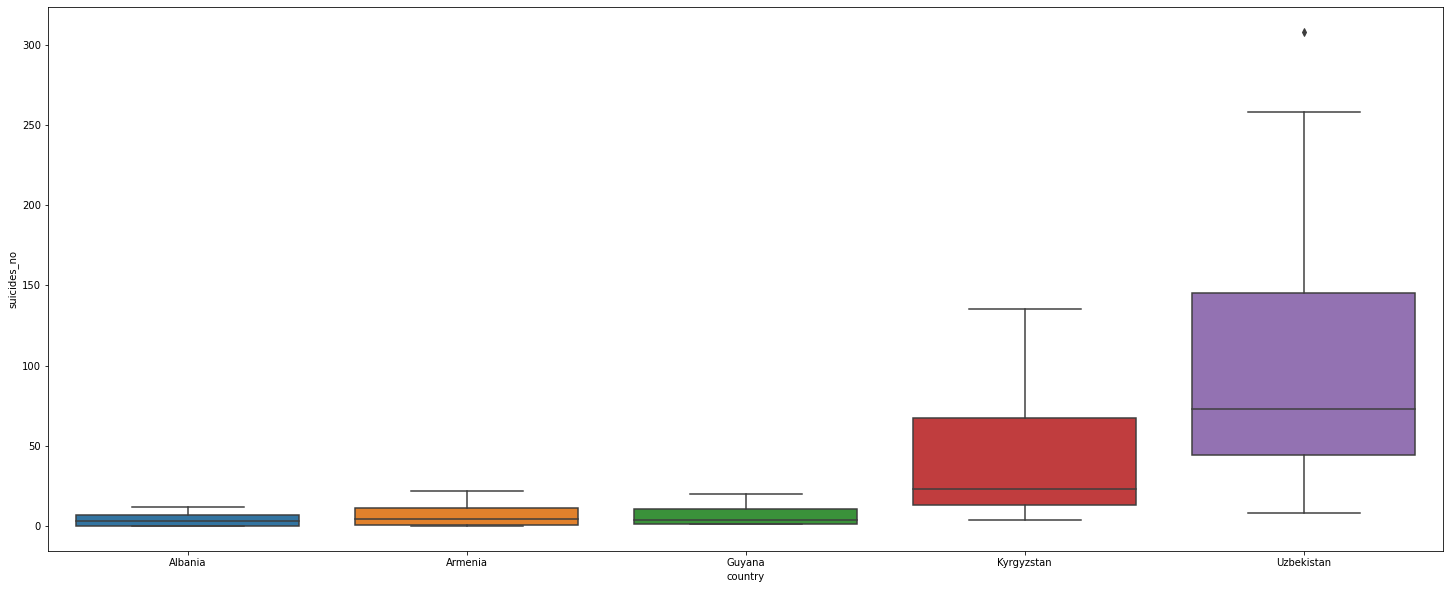

In [39]:
plt.figure(figsize=(25,10))
sns.boxplot(x='country', y='suicides_no', data=min_gdp_cap)
plt.show()

###The graph above shows the number of suicides for the countries with the lowest GDP/capita in 1992



###The graph below shows the number of suicides for the countries with the highest GDP/capita in 1992

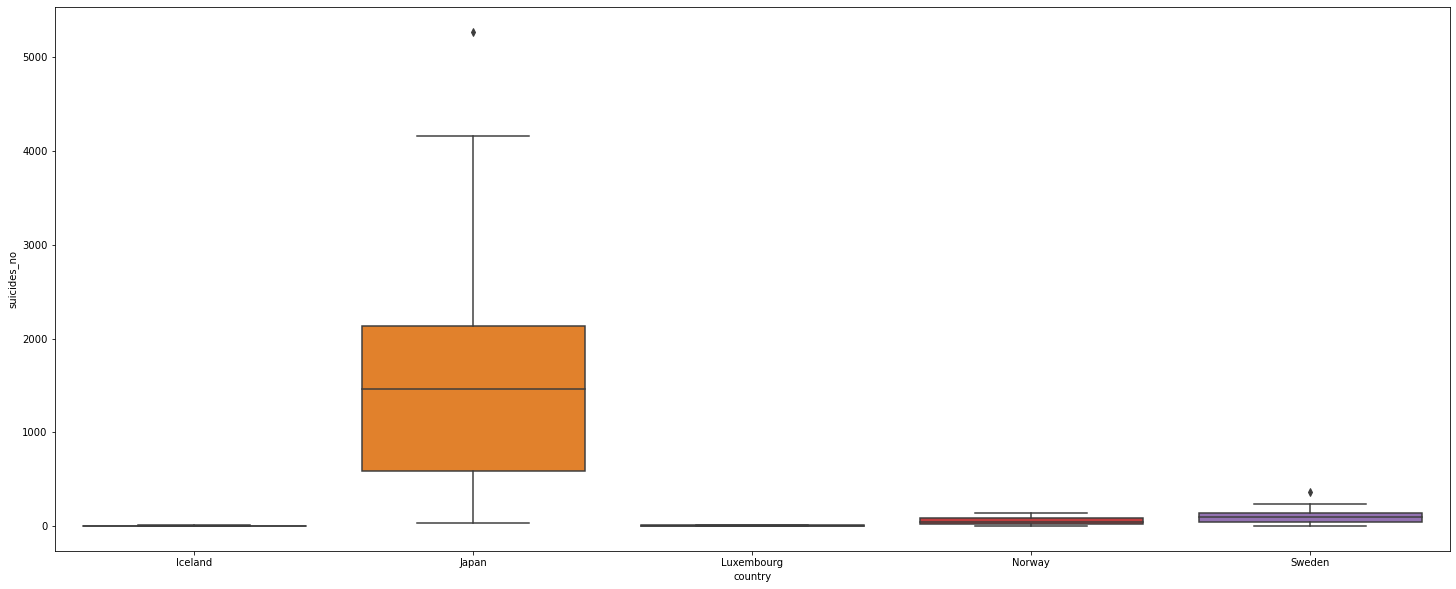

In [40]:
plt.figure(figsize=(25,10))
sns.boxplot(x='country', y='suicides_no', data=bom_min_gdp_cap)
plt.show()

There is less overlap in 1992 than there was in 2014 but still some. Japan is an extreme outlier that produced outstanding GDP/capita but also had very high suicide numbers when compared to the other top 5 GDP/capita countries. There could potential be societal issues within Japan alone that contribute to the high numbers of suicides. I will perform a Kruskal-Wallis and a Mood's Median test on the data. 

In [ ]:
stats.kruskal(min_gdp_cap['suicides_no'], bom_min_gdp_cap['suicides_no'])

KruskalResult(statistic=3.3556499172279617, pvalue=0.06697476837120041)

In [ ]:
stats.median_test(min_gdp_cap['suicides_no'], bom_min_gdp_cap['suicides_no'])

(0.3,
 0.583882420770365,
 10.5,
 array([[28, 32],
        [32, 28]], dtype=int64))

In a fun turn of events both tests return pvalues greater than .05 as such the null hypothsis is accepted and the hypothysis is rejected. In 1992 GDP/capita didn't have a significant correlation with suicide numbers. However, as the years have progressed the analysis of 2014 showed there was significant enough difference between the medians of the two datasets. 

In [49]:
get_95_ci(min_gdp_cap['suicides_no'], bom_min_gdp_cap['suicides_no'])

'The difference in means at the 95% confidence interval (two-tail) is between 99.22508315643981 and 593.1415835102268.'

## Generation

### Generational breakdown ordered from oldest to youngest. 

Checking generation distribution 

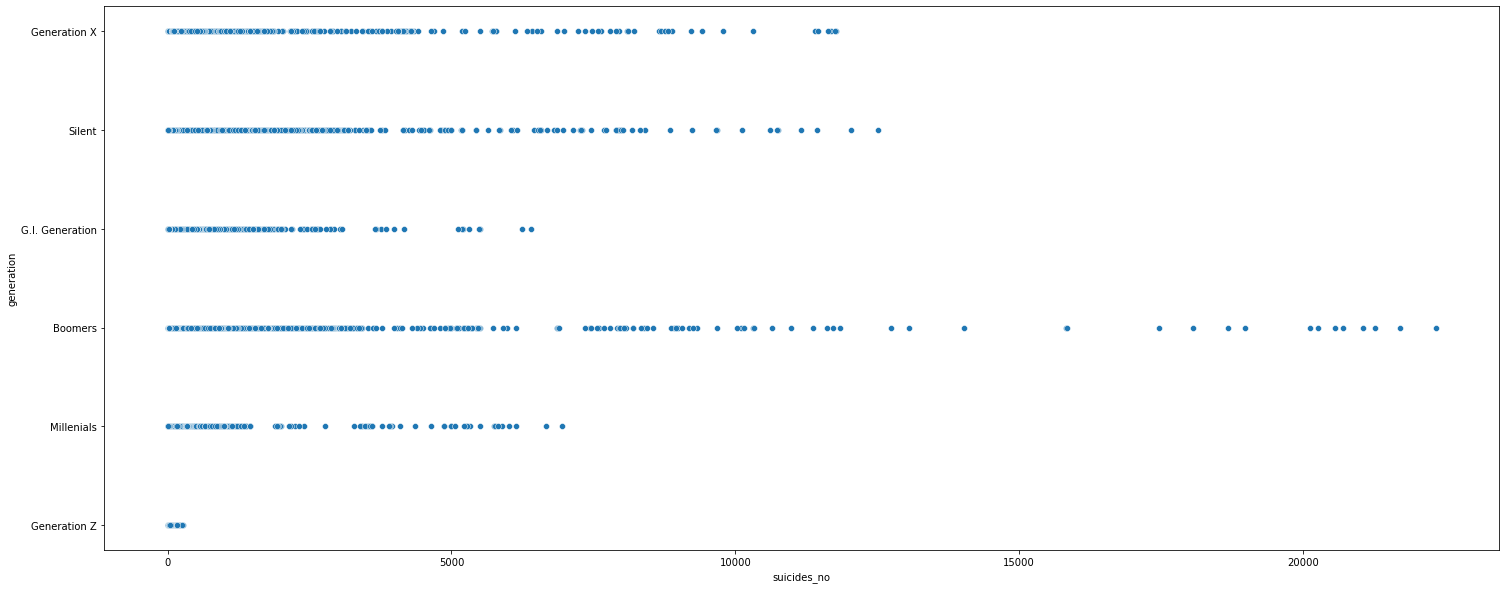

In [97]:
plt.figure(figsize=(25,10))
sns.scatterplot(x=info['suicides_no'], y=info['generation'])
plt.show()

In [ ]:
info['generation'].value_counts()

Filtering data by generation

In [87]:
# 1901 to 1927
G_I_ = info[info['generation'] == 'G.I. Generation']
# Checking for any general correlations from the GI generation.
#G_I_.corr()

# 1928 to 1945
Sil = info[info['generation'] == 'Silent'] 
# Checking for any general correlations from the Silent generation.
#Sil.corr()

# 1946 to 1964
Boom = info[info['generation'] == 'Boomers']
# Checking for any general correlations from the Boomer generation.
# Boom.corr(

# 1965 to 1979
Gen_X = info[info['generation'] == 'Generation X']
# Checking for any general correlations from the Gen-X generation.
# Gen_X.corr()

# 1980 to 1994
Gen_Y = info[info['generation'] == 'Millenials']
# Checking for any general correlations from the Gen-Y (Millennial) generation.
# Gen_Y.corr()

# 1995 to 2009
Gen_Z = info[info['generation'] == 'Generation Z']
# Checking for any general correlations from the Gen-Z generation.
# Gen_Z.corr()


In [ ]:
Boxplot to show outliers. Most countries seem to be outliers. 

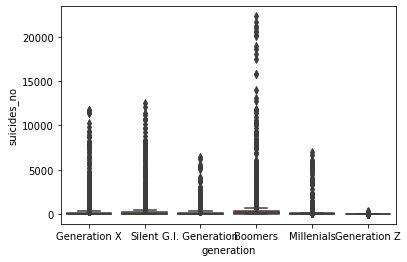

In [ ]:
sns.boxplot(x='generation',y='suicides_no',data=info)
plt.show()

The boxplot above seems to signal that the larger and longer a generation lives the more suicides over time. Which makes sense. What is a little worrisome is the Millenial generation overtaking the previous generation Gen-X in terms of suicide totals world wide. Given that the oldest Gen-Y indivudal is 40 they are entering their "peak" suicide years. 

Another visualization of the suicides per generation

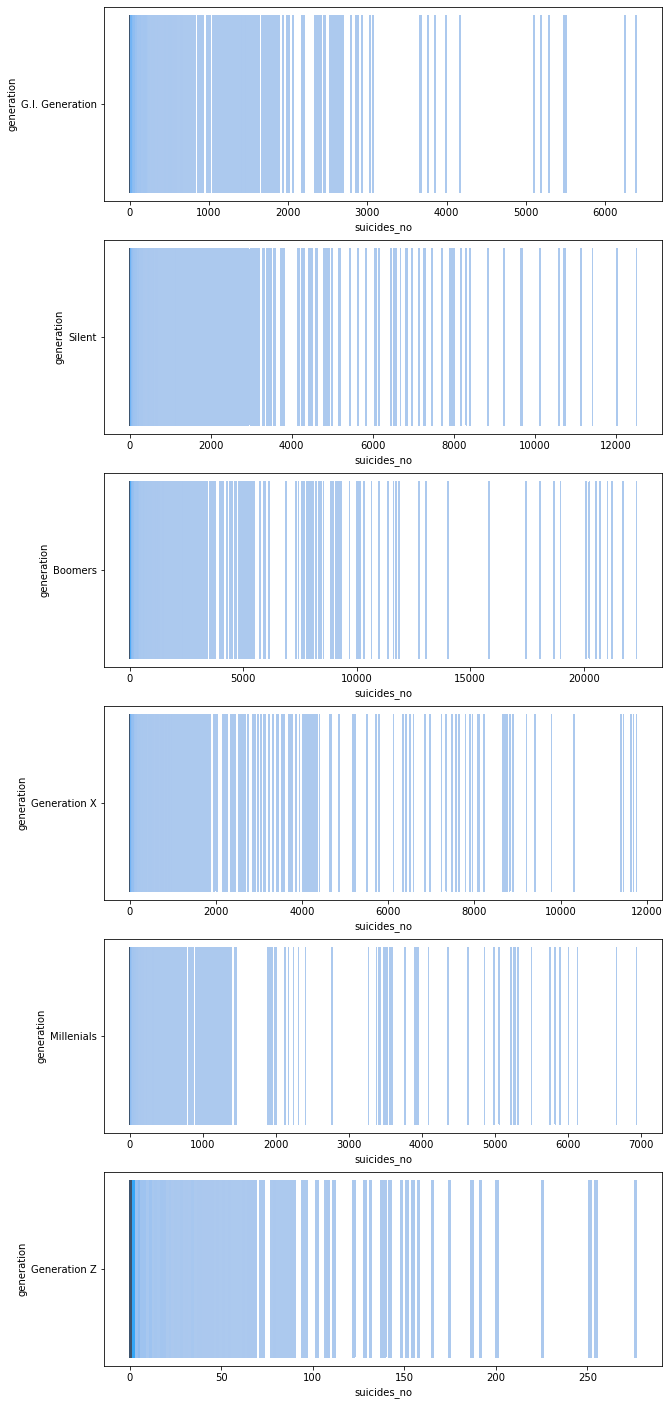

In [92]:
plt.figure(figsize=(10,25))
plt.subplot(611)
sns.histplot(x=G_I_['suicides_no'], y=G_I_['generation'])
plt.subplot(612)
sns.histplot(x=Sil['suicides_no'], y=Sil['generation'])
plt.subplot(613)
sns.histplot(x=Boom['suicides_no'], y=Boom['generation'])
plt.subplot(614)
sns.histplot(x=Gen_X['suicides_no'], y=Gen_X['generation'])
plt.subplot(615)
sns.histplot(x=Gen_Y['suicides_no'], y=Gen_Y['generation'])
plt.subplot(616)
sns.histplot(x=Gen_Z['suicides_no'], y=Gen_Z['generation'])

plt.show()

Checking skew and kurtosis of each generation

In [ ]:
print(stats.describe(G_I_['suicides_no']))
print(stats.describe(Sil['suicides_no']))
print(stats.describe(Boom['suicides_no']))
print(stats.describe(Gen_X['suicides_no']))
print(stats.describe(Gen_Y['suicides_no']))
print(stats.describe(Gen_Z['suicides_no']))

DescribeResult(nobs=2744, minmax=(0, 6401), mean=185.86333819241983, variance=269964.43082457973, skewness=5.756231608535365, kurtosis=44.076394420463465)
DescribeResult(nobs=6364, minmax=(0, 12517), mean=279.9723444374607, variance=773256.6897898195, skewness=6.999123555105218, kurtosis=61.93592791733218)
DescribeResult(nobs=4990, minmax=(0, 22338), mean=457.81523046092184, variance=2275357.482389754, skewness=8.20171324557536, kurtosis=86.77047080254788)
DescribeResult(nobs=6408, minmax=(0, 11767), mean=239.2016229712859, variance=645753.0771816951, skewness=8.103029487965829, kurtosis=82.38918178932983)
DescribeResult(nobs=5844, minmax=(0, 6945), mean=106.68360711841204, variance=179593.93530541877, skewness=9.484095418806, kurtosis=108.93840329849)
DescribeResult(nobs=1470, minmax=(0, 277), mean=10.820408163265306, variance=677.1413122907434, skewness=4.958040636595637, kurtosis=32.02922146096088)


#### Using the Kruskal test because there is no normality between the groups to determine any correlation between the generations and if there is a relationship between the generation and suicides. Test is conducted for each generation and their suicide counts.  

In [ ]:
stats.kruskal(G_I_['suicides_no'], Sil['suicides_no'], Boom['suicides_no'],
              Gen_X['suicides_no'], Gen_Y['suicides_no'], Gen_Z['suicides_no'])

KruskalResult(statistic=2388.3940577827525, pvalue=0.0)

In [ ]:
stats.median_test(G_I_['suicides_no'], Sil['suicides_no'], Boom['suicides_no'],
              Gen_X['suicides_no'], Gen_Y['suicides_no'], Gen_Z['suicides_no'])

(1903.5256719284546,
 0.0,
 25.0,
 array([[1341, 3460, 3245, 3493, 2084,  169],
        [1403, 2904, 1745, 2915, 3760, 1301]], dtype=int64))

The groups do not have equal means. With a pvalue of 0 we can reject the null hypothesis from both tests.  

In [93]:
pairwise_tukeyhsd(endog= info['suicides_no'],
                  groups = info['generation'],
                  alpha = .05).summary()

# Although not all of the pairs failed to reject the null hypothesis most of them did.

group1,group2,meandiff,p-adj,lower,upper,reject
Boomers,G.I. Generation,-271.9519,0.001,-332.4625,-211.4413,True
Boomers,Generation X,-218.6136,0.001,-266.6836,-170.5436,True
Boomers,Generation Z,-446.9948,0.001,-522.5525,-371.4371,True
Boomers,Millenials,-351.1316,0.001,-400.2067,-302.0566,True
Boomers,Silent,-177.8429,0.001,-225.9856,-129.7002,True
G.I. Generation,Generation X,53.3383,0.093,-4.7484,111.4249,False
G.I. Generation,Generation Z,-175.0429,0.001,-257.3369,-92.7489,True
G.I. Generation,Millenials,-79.1797,0.0018,-138.1008,-20.2587,True
G.I. Generation,Silent,94.109,0.001,35.9622,152.2558,True
Generation X,Generation Z,-228.3812,0.001,-302.012,-154.7504,True


## Age

Visualizing suicide by age group

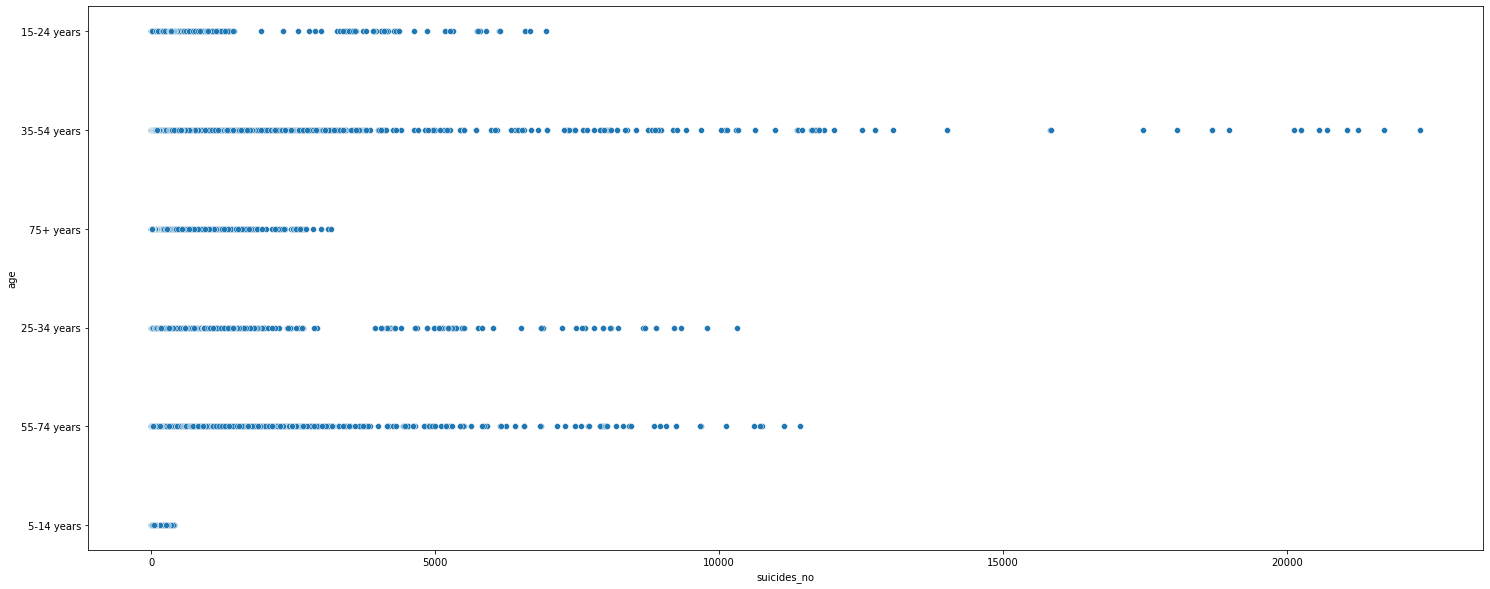

In [96]:
plt.figure(figsize=(25,10))
sns.scatterplot(x='suicides_no',y='age',data=info)
plt.show()

With Gen-Y apppraching the age range of 35-54 we should begin to see their numbers increasing over the years. Gen-X is currently within the peak age range for suicide but they appear to be handling their existence better than their younger Gen-Y peers. The boomer generation accounts for the largest suicide count by generation but they are past their "peak" suicide years. 

Another visualization for age group

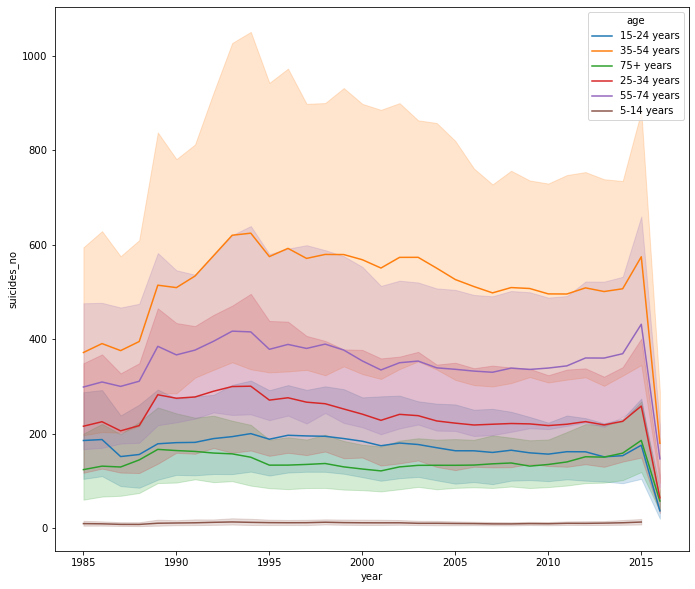

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(121)
sns.lineplot(x='year', y='suicides_no', hue='age', data=info)
plt.show()

In [ ]:
#info['age'].value_counts()

35-54 years    4642
25-34 years    4642
15-24 years    4642
55-74 years    4642
75+ years      4642
5-14 years     4610
Name: age, dtype: int64

Filtering for each age group

In [98]:
# Age 5-14 years
age5_14 = info[info['age'] == '5-14 years']

# Age 15-44 years
age15_24 = info[info['age'] == '15-24 years']

# Age 25-34 years
age25_34 = info[info['age'] == '25-34 years'] 

# Age 35-54 years
age35_54 = info[info['age'] == '35-54 years']

# Age 55-74 years
age55_74 = info[info['age'] == '55-74 years']

# Age 75+ years
age75 = info[info['age'] == '75+ years']


Checking skew and kurtosis for each age group

In [ ]:
print(stats.describe(age5_14['suicides_no']))
print(stats.describe(age15_24['suicides_no']))
print(stats.describe(age25_34['suicides_no']))
print(stats.describe(age35_54['suicides_no']))
print(stats.describe(age55_74['suicides_no']))
print(stats.describe(age75['suicides_no']))

DescribeResult(nobs=4610, minmax=(0, 404), mean=11.337093275488069, variance=955.2766667498138, skewness=6.630209454684844, kurtosis=56.92104873601261)
DescribeResult(nobs=4642, minmax=(0, 6945), mean=174.17966393795777, variance=272062.96706750174, skewness=7.427897323776809, kurtosis=66.4520988764027)
DescribeResult(nobs=4642, minmax=(0, 10310), mean=242.1180525635502, variance=579633.3206867476, skewness=7.438421346434031, kurtosis=66.97909401368017)
DescribeResult(nobs=4642, minmax=(0, 22338), mean=528.2509694097372, variance=2693602.9102824037, skewness=7.317529013751492, kurtosis=68.58514248099686)
DescribeResult(nobs=4642, minmax=(0, 11431), mean=357.2690650581646, variance=1035135.0667825346, skewness=5.770911962459936, kurtosis=40.30408019819139)
DescribeResult(nobs=4642, minmax=(0, 3171), mean=140.69754416199913, variance=133065.79085369603, skewness=4.3034833313270475, kurtosis=20.689406223460495)


In [ ]:
stats.kruskal(age5_14['suicides_no'], age15_24['suicides_no'], age25_34['suicides_no'],
              age35_54['suicides_no'], age55_74['suicides_no'], age75['suicides_no'])

KruskalResult(statistic=4554.039180909757, pvalue=0.0)

In [ ]:
stats.median_test(age5_14['suicides_no'], age15_24['suicides_no'], age25_34['suicides_no'],
              age35_54['suicides_no'], age55_74['suicides_no'], age75['suicides_no'])

(3603.6589475862993,
 0.0,
 25.0,
 array([[ 532, 2546, 2695, 3100, 2762, 2157],
        [4078, 2096, 1947, 1542, 1880, 2485]], dtype=int64))

The groups do not have equal means. With a pvalue of 0 we can reject the null hypothesis for both tests. 

In [99]:
pairwise_tukeyhsd(endog= info['suicides_no'],
                  groups = info['age'],
                  alpha = .05).summary()
# All but one of the pairings showed a rejection of the null hypothesis. 

group1,group2,meandiff,p-adj,lower,upper,reject
15-24 years,25-34 years,67.9384,0.0031,15.4725,120.4042,True
15-24 years,35-54 years,354.0713,0.001,301.6055,406.5372,True
15-24 years,5-14 years,-162.8426,0.001,-215.3994,-110.2858,True
15-24 years,55-74 years,183.0894,0.001,130.6235,235.5553,True
15-24 years,75+ years,-33.4821,0.4553,-85.948,18.9837,False
25-34 years,35-54 years,286.1329,0.001,233.6671,338.5988,True
25-34 years,5-14 years,-230.781,0.001,-283.3378,-178.2241,True
25-34 years,55-74 years,115.151,0.001,62.6852,167.6169,True
25-34 years,75+ years,-101.4205,0.001,-153.8864,-48.9547,True
35-54 years,5-14 years,-516.9139,0.001,-569.4707,-464.3571,True


## HDI

Seperating the HDI values into their corresponding ranges. Low = .35-.549 Med = .55-.699 High = .700-.799 Very-High = .8-1.00

Function for filtering the tiers

In [100]:
def tier(n):
    if n <= 0.549:
        return 'low'
    elif n <= .669: 
        return 'medium'
    elif n <= .799:
        return 'high'
    else:
        return 'very-high'

In [103]:
HDI_filter['HDI tier'] = HDI_filter['HDI for year'].apply(lambda x: tier(x))

<ipython-input-103-b750e35285e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HDI_filter['HDI tier'] = HDI_filter['HDI for year'].apply(lambda x: tier(x))


In [ ]:
HDI_filter.groupby('HDI tier').year.count()

HDI tier
high         3528
low            60
medium       1176
very-high    3600
Name: year, dtype: int64

In [104]:
# low HDI 
lowHDI = HDI_filter[HDI_filter['HDI tier'] == 'low']

# medium HDI
medHDI = HDI_filter[HDI_filter['HDI tier'] == 'medium']

# high HDI
highHDI = HDI_filter[HDI_filter['HDI tier'] == 'high'] 

# very high HDI
vhighHDI = HDI_filter[HDI_filter['HDI tier'] == 'very-high']

Visualizing suicides by HDI tier

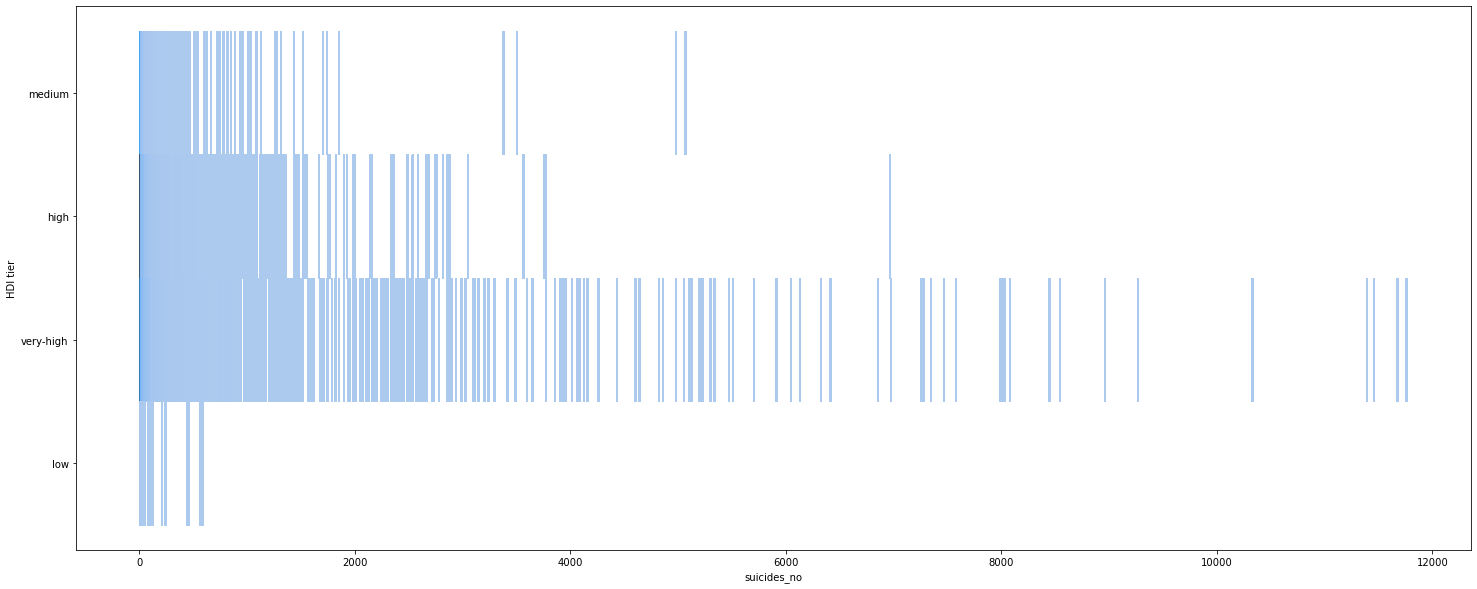

In [109]:
plt.figure(figsize=(25,10))
sns.histplot(x=HDI_filter['suicides_no'], y=HDI_filter['HDI tier'])
plt.show()

Visualization for each tier individually. 

<function matplotlib.pyplot.show(*args, **kw)>

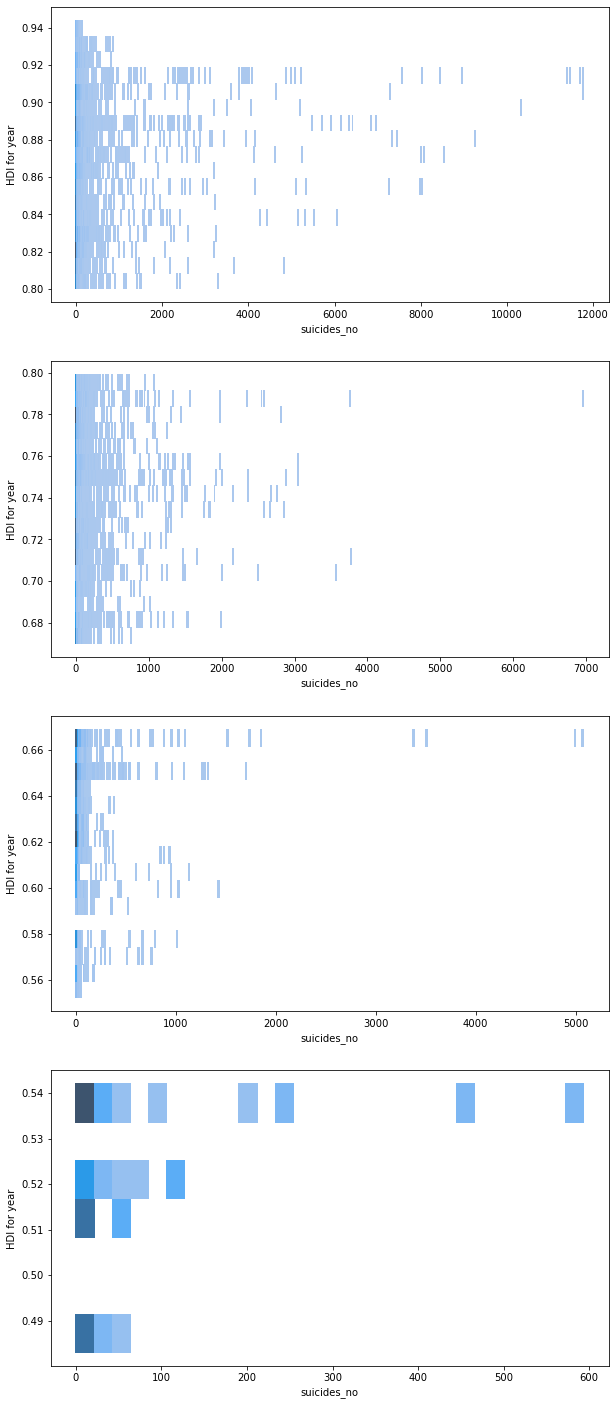

In [105]:
plt.figure(figsize=(10,25))
plt.subplot(411)
sns.histplot(x=vhighHDI['suicides_no'], y=vhighHDI['HDI for year'])
plt.subplot(412)
sns.histplot(x=highHDI['suicides_no'], y=highHDI['HDI for year'])
plt.subplot(413)
sns.histplot(x=medHDI['suicides_no'], y=medHDI['HDI for year'])
plt.subplot(414)
sns.histplot(x=lowHDI['suicides_no'], y=lowHDI['HDI for year'])
plt.show

In [110]:
stats.kruskal(lowHDI['suicides_no'], medHDI['suicides_no'], highHDI['suicides_no'], vhighHDI['suicides_no'])

KruskalResult(statistic=251.6242518942161, pvalue=2.9142046438335437e-54)

In [ ]:
Statistic = 251.6242518942161, p-value = 2.9142046438335437e-54
176.8078136740204, 4.3131808849473355e-38, 27.0, array([[  23,  493, 1549, 2086],[  37,  683, 1979, 1514]])

In [111]:
stats.median_test(lowHDI['suicides_no'], medHDI['suicides_no'], highHDI['suicides_no'], vhighHDI['suicides_no'])

(176.8078136740204,
 4.3131808849473355e-38,
 27.0,
 array([[  23,  493, 1549, 2086],
        [  37,  683, 1979, 1514]], dtype=int64))

There is enough of a difference statisically for the pvalue in both tests to be approaching zero. The null hypothesis can be rejected. It would appear there is a relationship between a rising HDI and increases in suicide numbers.

## SUMMARY
World leaders should seek to maximize the potential of one of the main factors for economic production: the workforce. A deceased citizen can not increase the economic output of a country. A country is only as strong as its weakest citizen. Special attention should be paid to individuals in Generation Y (Millenials) as they are overpassing Generation X for suicide totals and just beginning to enter their peak years. Unraveling the mystery of suicide will benefit all generations.  

Pairgrid serves no technical purpose. Just wanted to practice fiddling with it. 

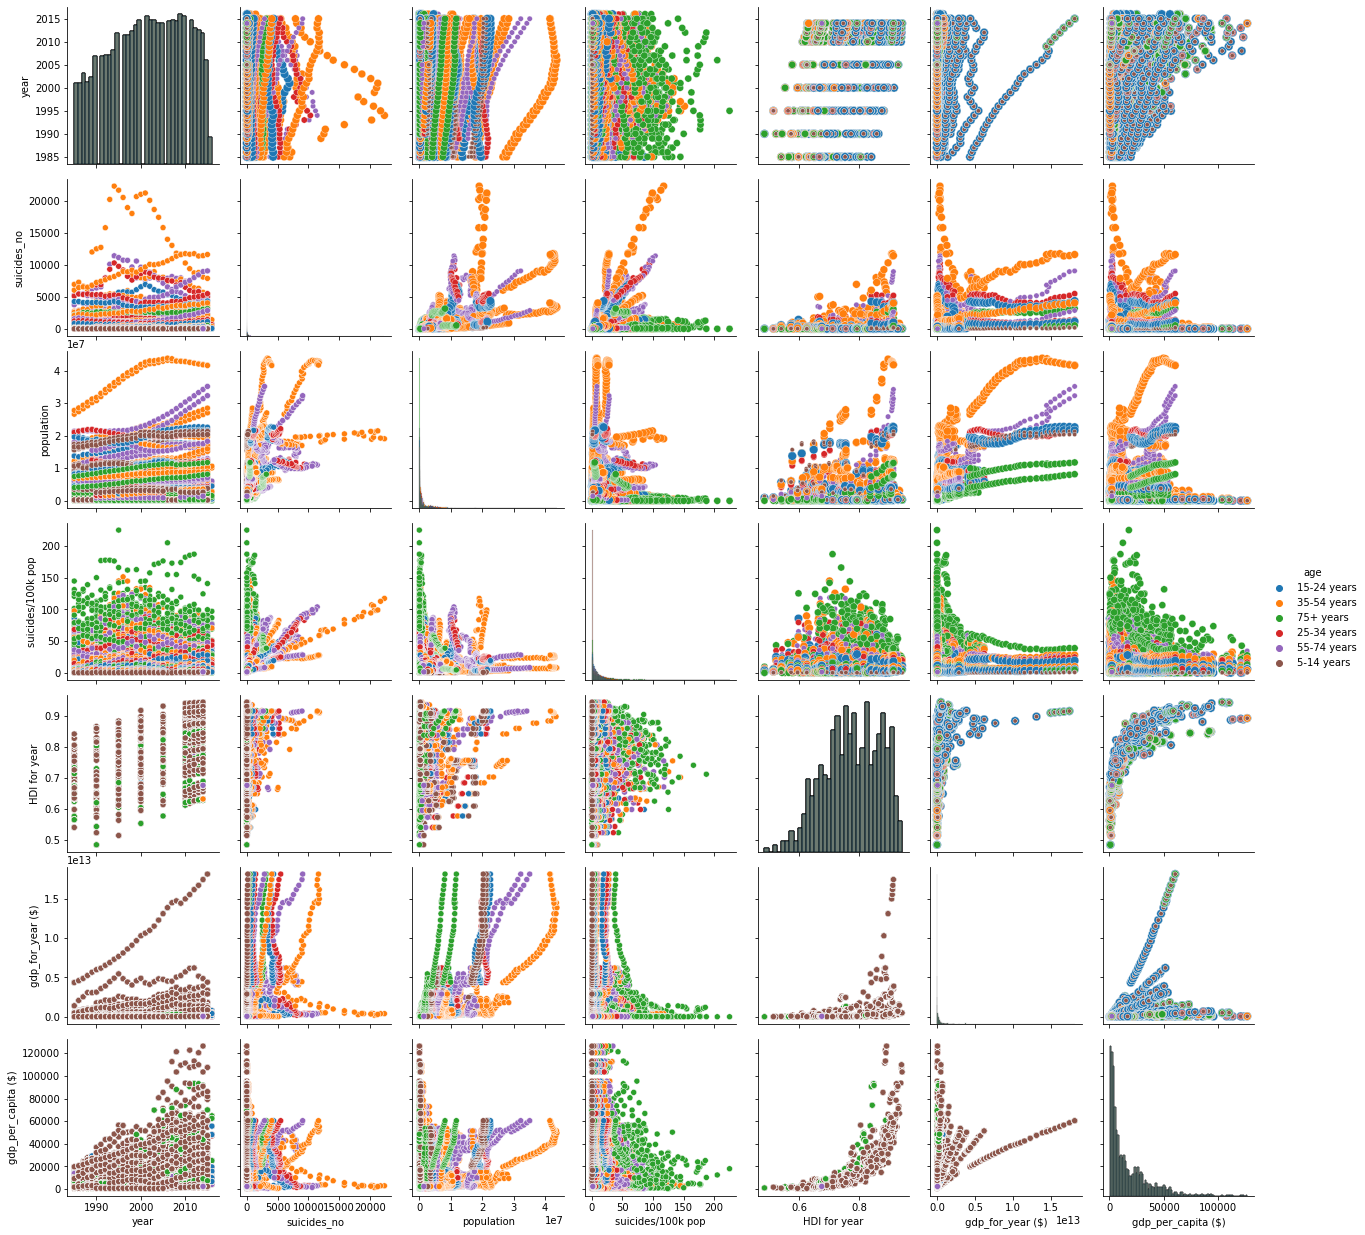

In [ ]:
#g = sns.PairGrid(info, hue='age', diag_sharey=False)
#g.map_upper(sns.scatterplot, size=info['age'])
#g.map_lower(sns.scatterplot)
#g.map_diag(sns.histplot)
#g.add_legend()

In [55]:
#tot92 = min_gdp_cap + bom_min_gdp_cap
#print(len(min_gdp_cap)+len(bom_min_gdp_cap))
#print(len(tot92))

120
